In [219]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns
sns.set_theme(style="white", palette='pastel')
colors=['#2878B5','#9AC9DB','#C82423','#FF8884']

In [4]:
#Years = ['1990', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']

In [230]:
Years = pd.read_csv('./GCAM_full/20220421_gcam_production.csv')
Years = Years.columns.values.tolist()[5:-1] ## string

Years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = MEDIUM_SIZE

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("legend",title_fontsize=SMALL_SIZE)

In [221]:
def load_date(root):
    data = pd.DataFrame()
    for year in Years:
        path = root + '/all_rates_'+ str(year) + '.csv'
        data0 = pd.read_csv(path)
        data = pd.concat([data,data0])
    data0 = data.query('Tax == 0')
    data1 = data.query('Tax == 1')
    return data0, data1

roots = ['./Exps-tax/SSP2','./Exps-tax/SSP2_0','./Exps-tax/SSP2_1','./Exps-tax/SSP2_2']

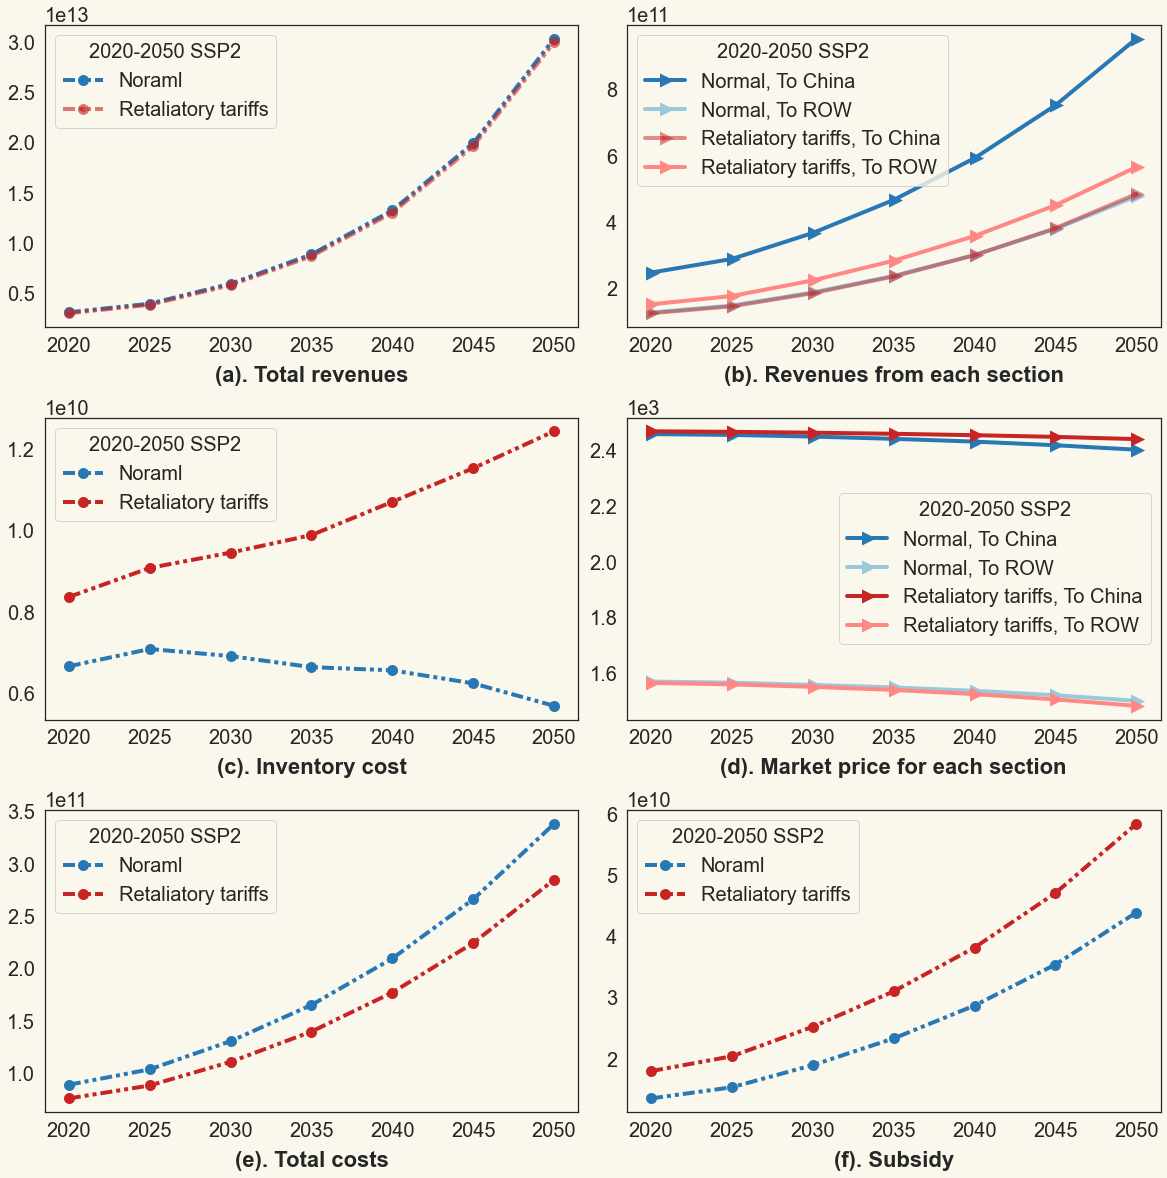

In [224]:
def plot(ax, Y, label, color, title=None, marker='o', alpha=1, ls=(0, (3, 1, 1, 1, 1, 1))):

    # ax.bar(data['Year'], data['OBJ_Values'] / 1e15)
    # ax.bar(data['Year']+2, data['Revenue_Total'] / 1e15)
    # ax.bar(data['Year']+4, data['Cost_Total'] /1e12)
    ax.plot(Years, Y, label=label, marker=marker, linewidth=4, markeredgewidth=5, alpha=alpha, linestyle=ls, color=color)
    ax.legend(facecolor='#faf8ed', title='2020-2050 SSP2')
    ax.set_xlabel(title, fontweight='bold', labelpad=10)


[data0, data1] = load_date(roots[0])

labels = ['Noraml', 'Retaliatory tariffs']

fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
#fig.tight_layout()
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(3, 4, hspace=0.3)
#
ax = plt.subplot(gs[0,:2])
y0 = data0['Revenue_Total']
y1 = data1['Revenue_Total']

plot(ax, y0, label=labels[0], color=colors[0])
plot(ax, y1, label=labels[1], color=colors[2], title='(a). Total revenues', alpha=0.6)
ax.set_facecolor('#faf8ed')
#
ax = plt.subplot(gs[0,2:])
y0_1 = data0['Revenue_China']
y0_2 = data0['Revenue_Row']

y1_1 = data1['Revenue_China']
y1_2 = data1['Revenue_Row']

plot(ax, y0_1, label='Normal, To China', color=colors[0], ls='solid', marker='>')
plot(ax, y0_2, label='Normal, To ROW', color=colors[1], ls='solid', marker='>')
plot(ax, y1_1, label='Retaliatory tariffs, To China', color=colors[2], ls='solid', marker='>', alpha=0.5)
plot(ax, y1_2, label='Retaliatory tariffs, To ROW', color=colors[3], ls='solid', marker='>', title='(b). Revenues from each section')
ax.set_facecolor('#faf8ed')
#
ax = plt.subplot(gs[2,:2])
y0 = data0['Cost_Total']
y1 = data1['Cost_Total']

plot(ax, y0, label=labels[0], color=colors[0])
plot(ax, y1, label=labels[1], color=colors[2], title='(e). Total costs')
ax.set_facecolor('#faf8ed')
#
ax = plt.subplot(gs[2,2:])
y0 = data0['Subsidy']
y1 = data1['Subsidy']

plot(ax, y0, label=labels[0], color=colors[0])
plot(ax, y1, label=labels[1], color=colors[2], title='(f). Subsidy')
ax.set_facecolor('#faf8ed')
#
ax = plt.subplot(gs[1,2:])
y0_1 = data0['China_Price']
y0_2 = data0['ROW_Price']

y1_1 = data1['China_Price']
y1_2 = data1['ROW_Price']

plot(ax, y0_1, 'Normal, To China', ls='solid', color=colors[0], marker='>')
plot(ax, y0_2, 'Normal, To ROW', ls='solid', color=colors[1], marker='>')
plot(ax, y1_1, 'Retaliatory tariffs, To China', ls='solid', color=colors[2], marker='>')
plot(ax, y1_2, 'Retaliatory tariffs, To ROW', ls='solid', color=colors[3], marker='>', title='(d). Market price for each section')
ax.set_facecolor('#faf8ed')
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
#
ax = plt.subplot(gs[1,:2])
y0 = data0['Cost_Holding']
y1 = data1['Cost_Holding']
plot(ax, y0, label=labels[0], color=colors[0])
plot(ax, y1, label=labels[1], color=colors[2], title='(c). Inventory cost')
ax.set_facecolor('#faf8ed')
#ax.get_legend().remove()

#ax.text(0.5,0.8,'2020-2050 SSP2', fontweight='bold', fontsize=25)
plt.savefig('./Figs/Fig_tariffs.pdf', dpi = 600, bbox_inches="tight")

ValueError: x and y must have same first dimension, but have shapes (21,) and (7,)

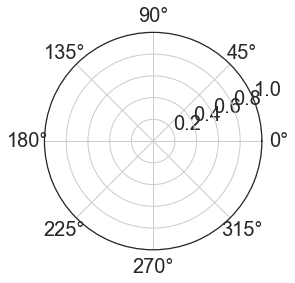

In [44]:
N = 21
x = np.linspace(0.0, 2 * np.pi, N,endpoint=False)
#y = data0['Revenue_Total'] /1e10

width = np.pi / 15
plt.gca(polar=True)
#plt.bar(x, y, width=width,alpha=0.5)
plt.plot(x,y0)
plt.plot(x,y1)
plt.show()

In [73]:
data0

,Scenario,Year,Rates,Demand_China,Demand_ROW,OBJ_Values,Revenue_Total,Cost_Total,Cost_Operation,Cost_Holding,...,Quantity_Y_Rail_Export,Quantity_Z_Export_Import,China_Price,ROW_Price,Revenue_Domestic,Revenue_China,Revenue_Row,Subsidy,Tax,Runtime
1,SSP2,2020,1_1_1_10,100314500,80251600,3030757576333,3120094581967,89337005633,47441562,6665585871,...,145652518,180566100,2458,1571,2733783245523,246667361207,126105096008,13538879228,0,19.084728
1,SSP2,2025,1_1_1_10,117320663,93856530,3870425643158,3974419019829,103993376671,60282761,7091187375,...,169354879,211177193,2455,1567,3523832390574,288105417308,147113195064,15368016882,0,19.580471
1,SSP2,2030,1_1_1_10,149734199,119787359,5827781370404,5958673206155,130891835750,82185274,6916473268,...,213912822,269521558,2449,1559,5386040622426,366781483348,186857064662,18994035718,0,20.282621
1,SSP2,2035,1_1_1_10,191102997,152882398,8704732714152,8870104024784,165371310631,109249390,6645147505,...,263557755,343985396,2441,1550,8143125264550,466614361385,237014928262,23349470584,0,19.548389
1,SSP2,2040,1_1_1_10,243901232,195120986,13042921191340,13252673359249,209752167908,144131530,6566104855,...,319653939,439022219,2431,1538,12330753839136,593084570862,300107708848,28727240400,0,19.287552
1,SSP2,2045,1_1_1_10,311286646,249029317,19667528781963,19933633152049,266104370084,189363950,6245446598,...,407640826,560315963,2418,1522,18766113097356,752957428697,379128756659,35433869333,0,21.677515
1,SSP2,2050,1_1_1_10,397289407,317831526,29995060937469,30333145736420,338084798950,248420158,5693056980,...,521002261,715120933,2402,1502,28857184347379,954493766251,477533463733,43934159056,0,21.108330


In [89]:
data0.shape[1]

32

<ipython-input-260-6ff94ff315d6>:16: RuntimeWarning: divide by zero encountered in true_divide
  rates = (y1-y0)/y0


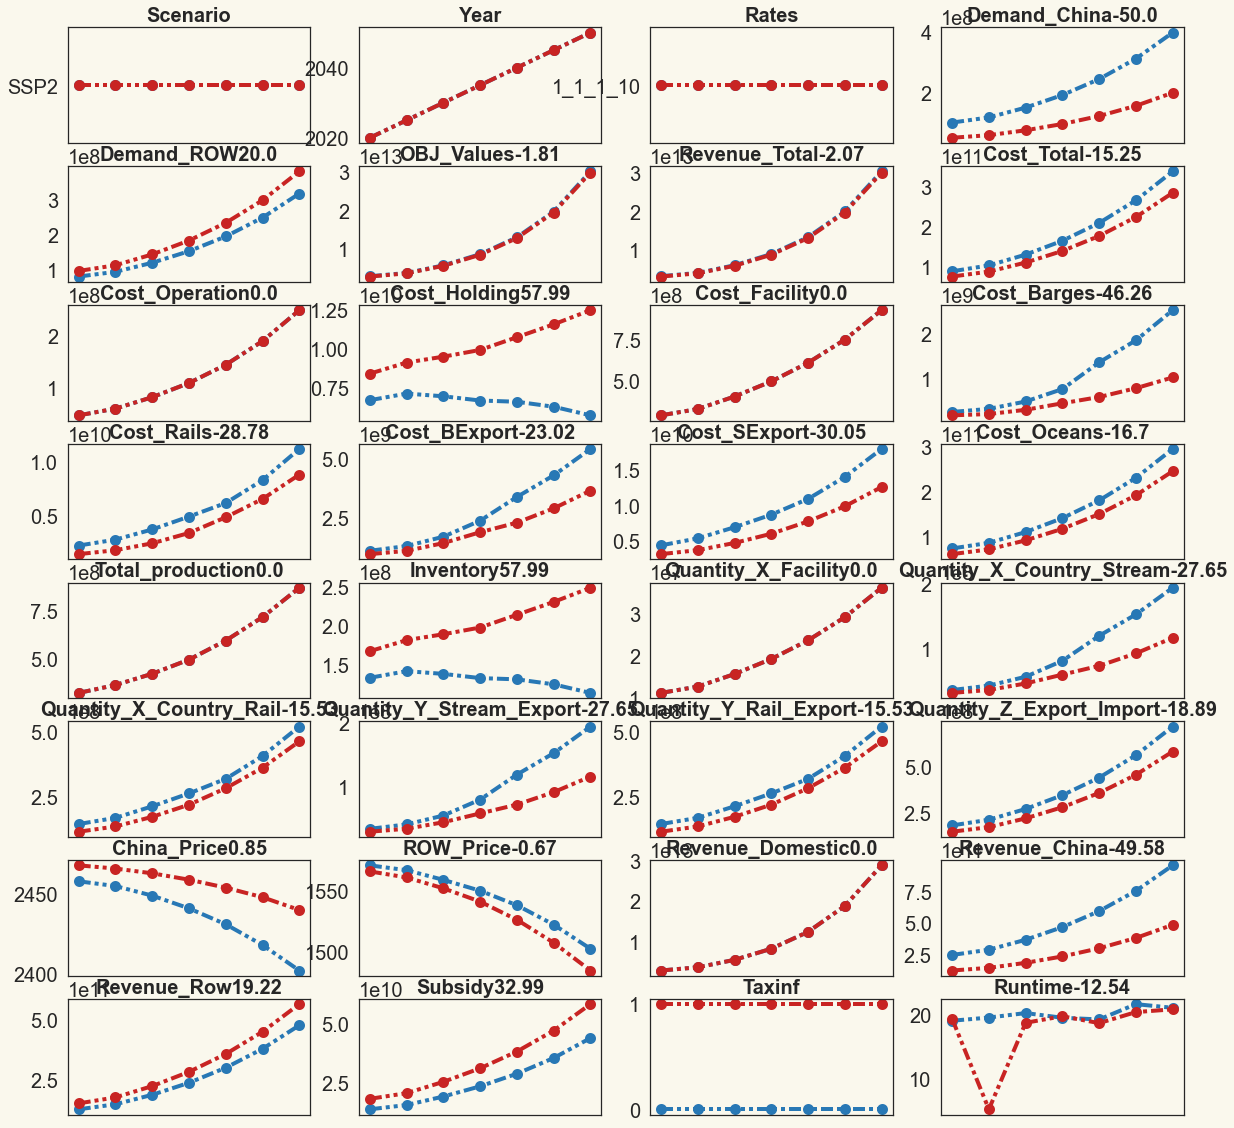

In [260]:
[data0, data1] = load_date(roots[0])
labels = ['Noraml', 'Retaliatory tariffs']

def plot(ax, Y, label, color, title=None, marker='o', alpha=1, ls=(0, (3, 1, 1, 1, 1, 1))):

    # ax.bar(data['Year'], data['OBJ_Values'] / 1e15)
    # ax.bar(data['Year']+2, data['Revenue_Total'] / 1e15)
    # ax.bar(data['Year']+4, data['Cost_Total'] /1e12)
    ax.plot(Years, Y, label=label, marker=marker, linewidth=4, markeredgewidth=5, alpha=alpha, linestyle=ls, color=color)
    #ax.legend(facecolor='#faf8ed')
    ax.set_title(title, fontweight='bold')
    ax.set_xticklabels([])

def cal_rate(y0, y1):
    #print(y0,y1)
    rates = (y1-y0)/y0
    rates = rates.mean()*100
    return str(round(rates,2))

def get_column(i):
    index = data0.columns.to_list()
    y0 = data0.iloc[:, i]
    y1 = data1.iloc[:, i]
    col = index[i]
    if i >2:
        rates = cal_rate(y0.to_numpy(), y1.to_numpy())
    else:
        rates = ''
    return col+rates, y0, y1


fig = plt.figure(figsize=(20, 20), facecolor='#faf8ed')
fig.tight_layout(h_pad=4)
#gs = GridSpec(3, 1, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
gs = GridSpec(8, 4)
#
for num in range(data0.shape[1]):
    col_index = int(num % 4)
    row_index = int(num / 4)

    ax = plt.subplot(gs[row_index, col_index])
    col, y0, y1 = get_column(num)
    rates = cal_rate(y0, y1)

    plot(ax, y0, label=labels[0], color=colors[0])
    plot(ax, y1, label=labels[1], color=colors[2], title=col)
    ax.set_facecolor('#faf8ed')

#plt.savefig('./Figs/tariffs_reference2.pdf', dpi = 600, bbox_inches="tight")

In [228]:
[data0, data1] = load_date(roots[0])

y0 = data0['Revenue_Total'].to_numpy()
y1 = data1['Revenue_Total'].to_numpy()

a = (y1-y0)/y0
a = a.mean()
a

-0.02068184202066354

In [170]:
y0_1 = data0['Revenue_China'].to_numpy()
y0_2 = data0['Revenue_Row'].to_numpy()

a= (y0_2 / y0_1).mean()
a

0.5070123379619593

In [171]:
y1_1 = data1['Revenue_China'].to_numpy()
y1_2 = data1['Revenue_Row'].to_numpy()

a= (y1_2 / y1_1).mean()
a

1.1988532689778995

In [173]:
y0 = data0['Subsidy'].to_numpy()
y1 = data1['Subsidy'].to_numpy()

y0_0 = data0['Revenue_Total'].to_numpy()
y1_1 = data1['Revenue_Total'].to_numpy()

a = ((y0 / y0_0).mean() + (y1 / y1_1).mean() )/2
a

0.003275171606450145

In [237]:
y0_1 = data0['China_Price'].to_numpy()
y0_2 = data0['ROW_Price'].to_numpy()

y1_1 = data1['China_Price'].to_numpy()
y1_2 = data1['ROW_Price'].to_numpy()

a = (y1_1 - y0_1) /y0_1
a.mean()

0.008475410131736276

In [239]:
b = (y1_2 - y0_2) /y0_2
b.mean()

-0.006707140492340056

In [243]:
c = ((y0_1 / y0_2).mean() + (y1_1 / y1_2).mean())/2
c

1.590052591311267

In [246]:
y0 = data0['Subsidy'].to_numpy()
y1 = data1['Subsidy'].to_numpy()

a =(y1-y0)/y0
a = a.mean()
a

0.3299186750546713

In [247]:
y0 = data0['Cost_Total'].to_numpy()
y1 = data1['Cost_Total'].to_numpy()

a = (y1-y0)/y0
a = a.mean()
a

-0.15248707874825845